In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # For optional evaluation

In [3]:
cs = pd.read_csv('Mall_Customers.csv')
cs

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
cs.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Check for missing values
cs.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

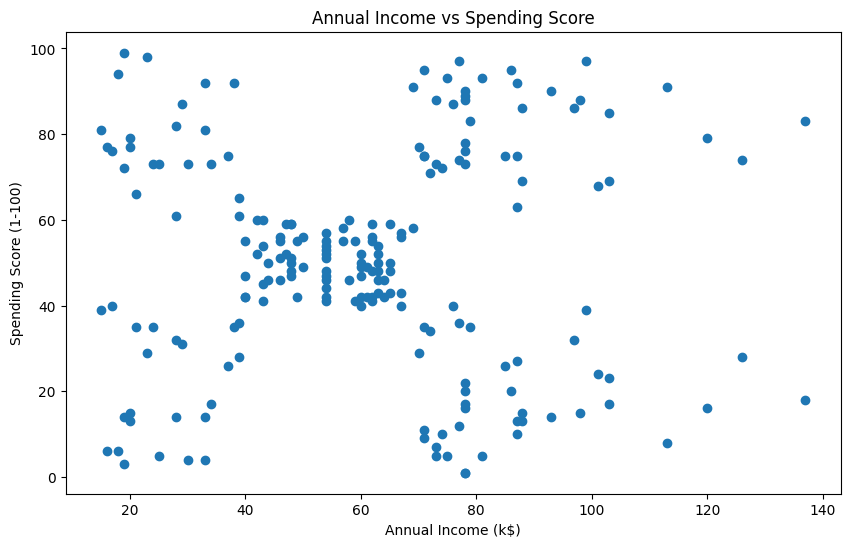

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(cs['Annual Income (k$)'], cs['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [10]:
# Selecting features for clustering
X = cs[['Annual Income (k$)', 'Spending Score (1-100)']]

#Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Converting scaled data back to DataFrame for easier handling
X_scaled_cs = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_cs

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [11]:
X_scaled_cs.describe()

,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


In [12]:
X_scaled_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Annual Income (k$)      200 non-null    float64
 1   Spending Score (1-100)  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


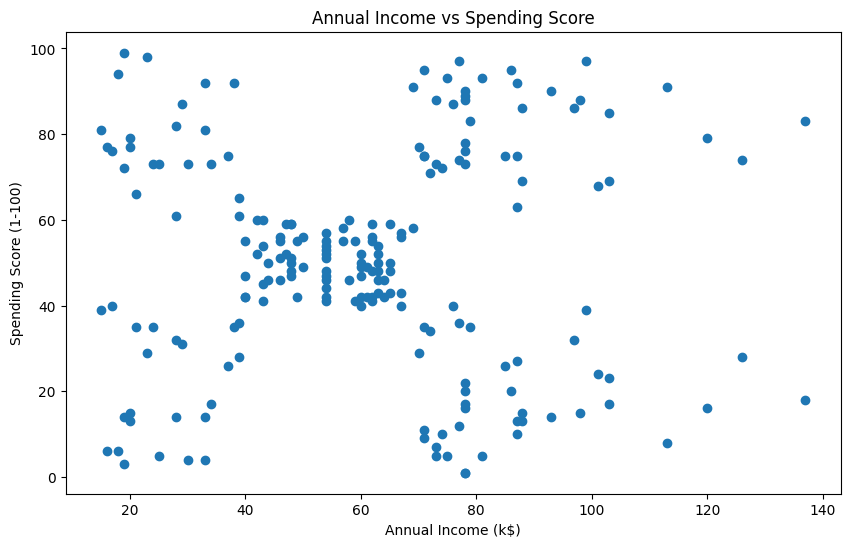

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(cs['Annual Income (k$)'], cs['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

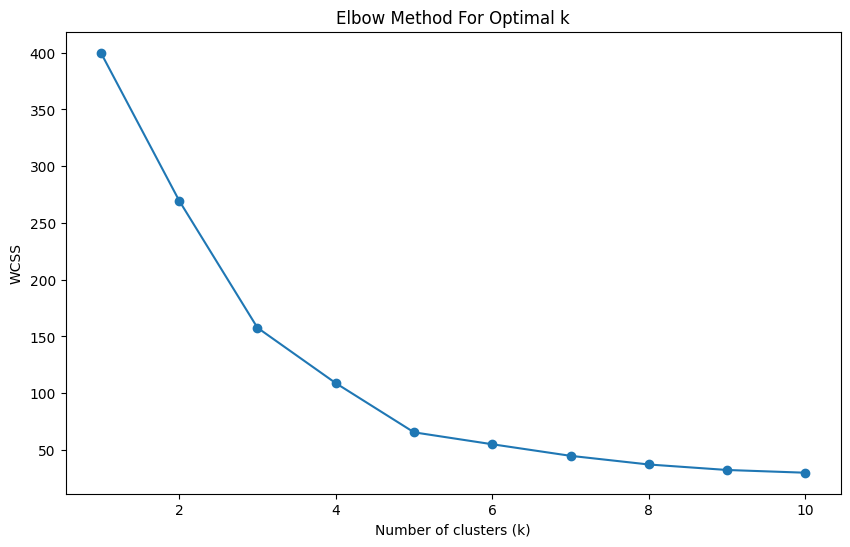

In [17]:
# Elbow Method to find optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled_cs)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


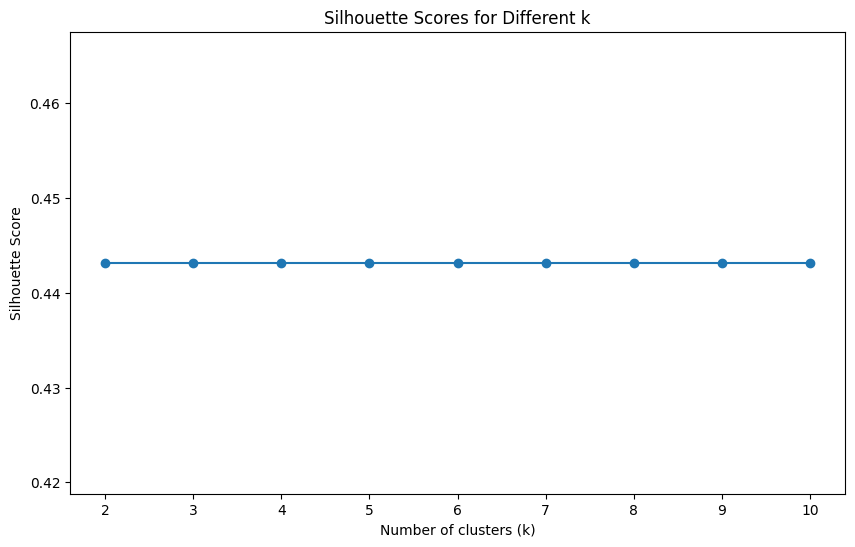

In [19]:
# Silhouette Score to validate the choice of k (optional)
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled_cs)
    silhouette_avg = silhouette_score(X_scaled_cs, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [22]:
# Applying KMeans with the optimal number of clusters (k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled_cs)

# Adding the cluster labels to the original dataframe
cs['Cluster'] = clusters = y_kmeans

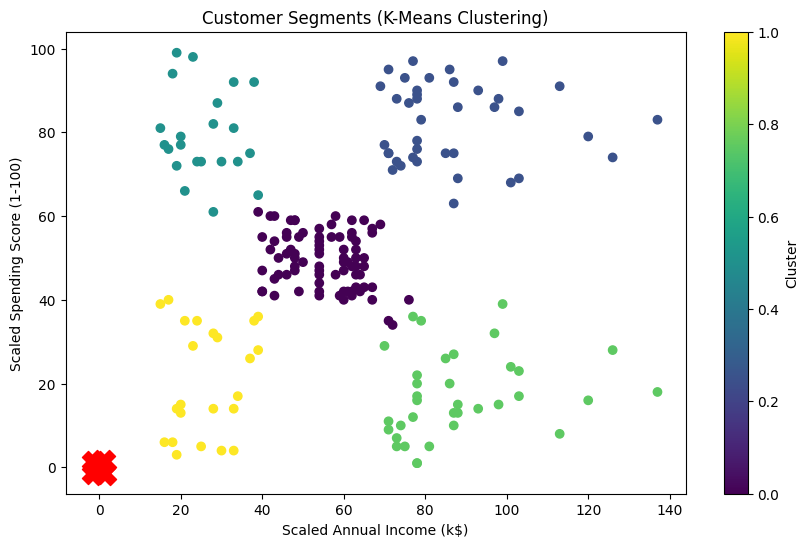

In [24]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(cs['Annual Income (k$)'], cs['Spending Score (1-100)'], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Scaled Annual Income (k$)')
plt.ylabel('Scaled Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

Trying DBSCAN Clustering

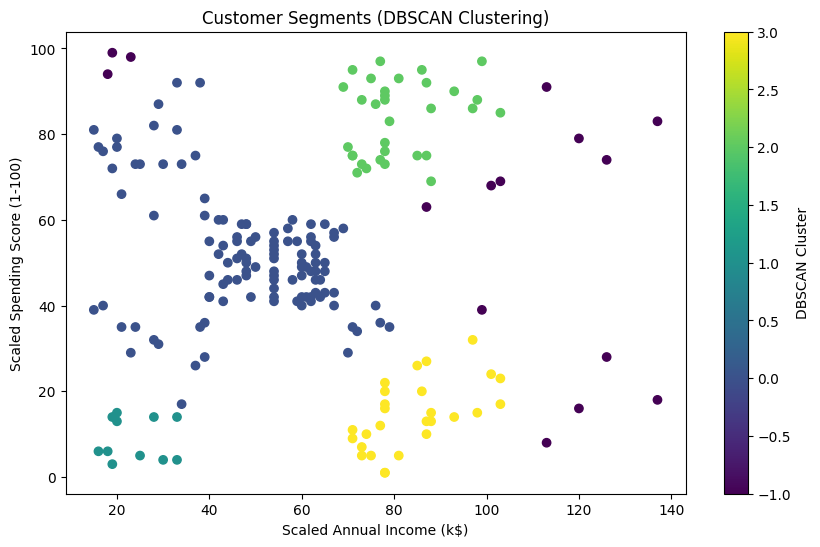

In [28]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled_cs)

# Adding the cluster labels to the original dataframe
cs['DBSCAN_Cluster'] = y_dbscan

# Visualizing DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(cs['Annual Income (k$)'], cs['Spending Score (1-100)'], c=y_dbscan, cmap='viridis')
plt.title('Customer Segments (DBSCAN Clustering)')
plt.xlabel('Scaled Annual Income (k$)')
plt.ylabel('Scaled Spending Score (1-100)')
plt.colorbar(label='DBSCAN Cluster')
plt.show()

Analyzing Average Spending per Cluster

In [47]:
# Averaging Spending Score and Annual Income per KMeans Cluster
kmeans_cluster_analysis = cs.groupby('Cluster').agg({
        'Annual Income (k$)': 'mean', 
        'Spending Score (1-100)': 'mean',
        'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Cluster Size'})

print(kmeans_cluster_analysis)

         Annual Income (k$)  Spending Score (1-100)  Cluster Size
Cluster                                                          
0                 55.296296               49.518519            81
1                 86.538462               82.128205            39
2                 25.727273               79.363636            22
3                 88.200000               17.114286            35
4                 26.304348               20.913043            23
